In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# 1. Frequency tagging
## 1.1 PSD

In [34]:
participants = ['A0', 'A1', 'A2'] 
snr = []
for participant in participants:
    df_participant = pd.read_csv(f'files/{participant}_snr.csv', index_col=False)
    df_participant['participant'] = participant
    snr.append(df_participant)
snr = pd.concat(snr)
snr['PSD'] = snr['value']
# Average over electrodes
snr = snr.groupby(['freq', 'cued', 'participant'])['PSD'].mean().reset_index()

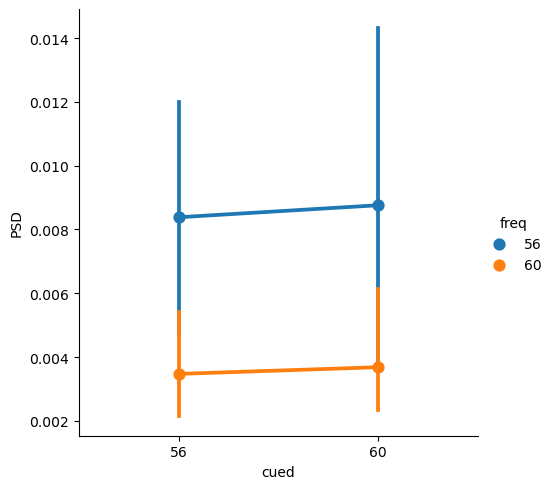

In [35]:
sns.catplot(y='PSD', hue='freq', x='cued', data=snr, kind='point')

For an attentional effect, we expect the left plot to decrease and the right one to increase. Standard deviation are between the electrodes. 

In [4]:
snr['cued'] = (snr['freq'] == snr['cued']).astype(int)
snr.loc[snr['freq'] == 56, 'freq'] = 0
snr.loc[snr['freq'] == 60, 'freq'] = 1
print(snr)

    freq  cued participant       PSD
0      0     1          A0  0.004709
1      0     1          A1  0.008438
2      0     1          A2  0.012004
3      0     0          A0  0.003736
4      0     0          A1  0.008242
5      0     0          A2  0.014304
6      1     0          A0  0.002863
7      1     0          A1  0.002143
8      1     0          A2  0.005412
9      1     1          A0  0.002352
10     1     1          A1  0.002555
11     1     1          A2  0.006143


In [5]:
md = smf.mixedlm("PSD ~ cued * freq", snr, groups=snr["participant"])
mdf = md.fit()
print(mdf.summary())

        Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: PSD    
No. Observations: 12      Method:             REML   
No. Groups:       3       Scale:              0.0000 
Min. group size:  4       Log-Likelihood:     34.2512
Max. group size:  4       Converged:          Yes    
Mean group size:  4.0                                
-----------------------------------------------------
           Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------
Intercept   0.009    0.002  4.339 0.000  0.005  0.013
cued       -0.000    0.002 -0.244 0.807 -0.003  0.003
freq       -0.005    0.002 -3.427 0.001 -0.008 -0.002
cued:freq   0.001    0.002  0.269 0.788 -0.004  0.005
Group Var   0.000    0.006                           



/home/lea/anaconda3/envs/ads_thesis/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


## 1.2 IT coherence

In [6]:
participants = ['A0', 'A1', 'A2'] 
ITcoh = []
for participant in participants:
    df_participant = pd.read_csv(f'files/ITcoh_{participant}.csv', index_col=False)
    df_participant['participant'] = participant
    ITcoh.append(df_participant)
ITcoh = pd.concat(ITcoh)
#Average over electrodes
ITcoh = ITcoh.groupby(['participant','cued','coh_with','time']).ITcoherence.mean().reset_index()
ITcoh

,participant,cued,coh_with,time,ITcoherence
0,A0,56,56,-1.000000,0.098629
1,A0,56,56,-0.999512,0.098272
2,A0,56,56,-0.999023,0.097930
3,A0,56,56,-0.998535,0.097613
4,A0,56,56,-0.998047,0.097328
...,...,...,...,...,...
49159,A2,60,60,0.998047,0.217818
49160,A2,60,60,0.998535,0.217590
49161,A2,60,60,0.999023,0.217362
49162,A2,60,60,0.999512,0.217135


/home/lea/anaconda3/envs/ads_thesis/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/lea/anaconda3/envs/ads_thesis/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/lea/anaconda3/envs/ads_thesis/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/lea/anaconda3/envs/ads_thesis/lib/python3.12/site-packages/seaborn/_oldcore.py:1075

<Axes: xlabel='time', ylabel='ITcoherence'>

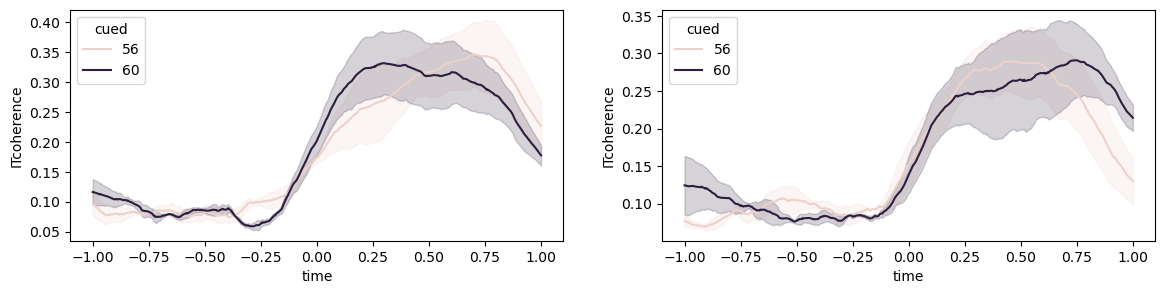

In [7]:
fig, ax = plt.subplots(1,2, figsize=(14,3))
sns.lineplot(y='ITcoherence', hue='cued', x='time', data=ITcoh[ITcoh.coh_with == 56], errorbar='se', ax=ax[0])
sns.lineplot(y='ITcoherence', hue='cued', x='time', data=ITcoh[ITcoh.coh_with == 60], errorbar='se', ax=ax[1])

In [8]:
ITcoh_stim_onset = ITcoh[ITcoh.time == 1]
ITcoh_stim_onset['cued'] = (ITcoh_stim_onset['coh_with'] == ITcoh_stim_onset['cued']).astype(int)
ITcoh_stim_onset.loc[ITcoh_stim_onset['coh_with'] == 56, 'coh_with'] = 0
ITcoh_stim_onset.loc[ITcoh_stim_onset['coh_with'] == 60, 'coh_with'] = 1
print(ITcoh_stim_onset)

      participant  cued  coh_with  time  ITcoherence
4096           A0     1         0   1.0     0.190600
8193           A0     0         1   1.0     0.159049
12290          A0     0         0   1.0     0.156663
16387          A0     1         1   1.0     0.243192
20484          A1     1         0   1.0     0.179212
24581          A1     0         1   1.0     0.066898
28678          A1     0         0   1.0     0.165625
32775          A1     1         1   1.0     0.183095
36872          A2     1         0   1.0     0.310464
40969          A2     0         1   1.0     0.163799
45066          A2     0         0   1.0     0.210226
49163          A2     1         1   1.0     0.216907


/tmp/ipykernel_10680/3325495074.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ITcoh_stim_onset['cued'] = (ITcoh_stim_onset['coh_with'] == ITcoh_stim_onset['cued']).astype(int)


In [9]:
md = smf.mixedlm("ITcoherence ~ cued", ITcoh_stim_onset, groups=ITcoh_stim_onset["participant"])
mdf = md.fit()
print(mdf.summary())

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: ITcoherence
No. Observations: 12      Method:             REML       
No. Groups:       3       Scale:              0.0015     
Min. group size:  4       Log-Likelihood:     15.2046    
Max. group size:  4       Converged:          Yes        
Mean group size:  4.0                                    
----------------------------------------------------------
             Coef.  Std.Err.    z    P>|z|  [0.025  0.975]
----------------------------------------------------------
Intercept    0.154     0.025  6.207  0.000   0.105   0.202
cued         0.067     0.022  3.005  0.003   0.023   0.110
Group Var    0.001     0.043                              



/home/lea/anaconda3/envs/ads_thesis/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


# 2. Noise tagging

## 2.1 Cross-correlation of the cued and uncued tags

In [151]:
participants = ['A0', 'A1', 'A2'] 
crosscorr = []
for participant in participants:
    df_participant = pd.read_csv(f'files/{participant}_crosscorr_time.csv', index_col=False)
    df_participant['participant'] = participant
    crosscorr.append(df_participant)
crosscorr = pd.concat(crosscorr)
crosscorr['Cor EEG/tag'] = crosscorr['value']

Text(0, 0.5, 'Cor EEG/tag')

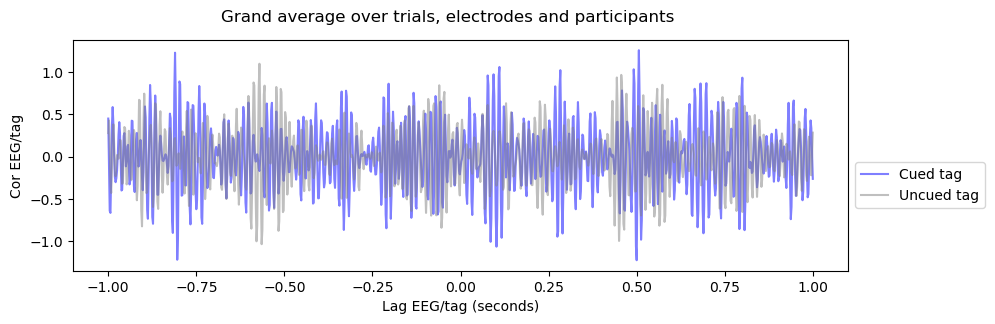

In [165]:
fig, ax = plt.subplots(figsize=(10,3))
average = crosscorr[crosscorr.Cueing == 'Cued'].groupby('Time').value.mean().reset_index()
ax.plot(average.Time, average.value, color='blue', label='Cued tag', alpha=.5)
average = crosscorr[crosscorr.Cueing == 'Uncued'].groupby('Time').value.mean().reset_index()
ax.plot(average.Time, average.value, color='grey', label='Uncued tag', alpha=.5)


plt.suptitle('Grand average over trials, electrodes and participants');

ax.legend(bbox_to_anchor = (1,0.5))
ax.set_xlabel('Lag EEG/tag (seconds)')
ax.set_ylabel('Cor EEG/tag')

### 2.1.1 Pre-post on cued

In [134]:
participants = ['A0', 'A1', 'A2'] 
crosscorr = []
for participant in participants:
    df_participant = pd.read_csv(f'files/{participant}_crosscor_prepost.csv', index_col=False)
    df_participant['participant'] = participant
    crosscorr.append(df_participant)
crosscorr = pd.concat(crosscorr)
crosscorr['Max crosscorrelation'] = crosscorr['value']
#averaging over electrodes
crosscorr = crosscorr.groupby(['participant','cued','prepost']).mean().reset_index()
crosscorr['Cueing'] = crosscorr['cued']
crosscorr['Cueing'] = crosscorr['cued'].replace({'cued': 'Cued', 'uncued': 'Uncued'})
crosscorr['Pre/post tag display'] = crosscorr['prepost'].replace({'pre': 'Pre-display', 'post': 'Post-display'})



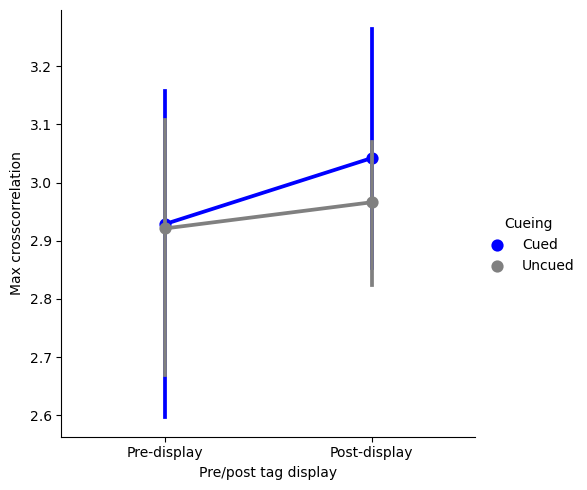

In [135]:
sns.catplot(y='Max crosscorrelation', x='Pre/post tag display', hue='Cueing', data=crosscorr, kind='point', order=['Pre-display','Post-display'], palette=['blue','grey'])

In [136]:
crosscorr.loc[crosscorr['prepost'] == 'pre', 'prepost'] = 0
crosscorr.loc[crosscorr['prepost'] == 'post', 'prepost'] = 1
crosscorr.loc[crosscorr['cued'] == 'uncued', 'cued'] = 0
crosscorr.loc[crosscorr['cued'] == 'cued', 'cued'] = 1
print(crosscorr)

   participant cued prepost     value  Max crosscorrelation  Cueing  \
0           A0    1       1  3.263374              3.263374    Cued   
1           A0    1       0  2.596629              2.596629    Cued   
2           A0    0       1  3.004417              3.004417  Uncued   
3           A0    0       0  3.107775              3.107775  Uncued   
4           A1    1       1  3.010433              3.010433    Cued   
5           A1    1       0  3.158048              3.158048    Cued   
6           A1    0       1  2.823860              2.823860  Uncued   
7           A1    0       0  2.985712              2.985712  Uncued   
8           A2    1       1  2.853088              2.853088    Cued   
9           A2    1       0  3.031544              3.031544    Cued   
10          A2    0       1  3.070624              3.070624  Uncued   
11          A2    0       0  2.670157              2.670157  Uncued   

   Pre/post tag display  
0          Post-display  
1           Pre-display 

In [137]:
md = smf.mixedlm("value ~ cued * prepost", crosscorr, groups=crosscorr["participant"])
mdf = md.fit()
print(mdf.summary())

             Mixed Linear Model Regression Results
Model:                 MixedLM    Dependent Variable:    value  
No. Observations:      12         Method:                REML   
No. Groups:            3          Scale:                 0.0492 
Min. group size:       4          Log-Likelihood:        -1.5029
Max. group size:       4          Converged:             No     
Mean group size:       4.0                                      
----------------------------------------------------------------
                       Coef. Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------------
Intercept              2.921    0.128 22.806 0.000  2.670  3.172
cued[T.1]              0.008    0.181  0.042 0.967 -0.348  0.363
prepost[T.1]           0.045    0.181  0.249 0.803 -0.310  0.400
cued[T.1]:prepost[T.1] 0.068    0.256  0.267 0.789 -0.434  0.571
Group Var              0.000                                    



/home/lea/anaconda3/envs/ads_thesis/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/lea/anaconda3/envs/ads_thesis/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/lea/anaconda3/envs/ads_thesis/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/lea/anaconda3/envs/ads_thesis/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/lea/anaconda3/envs/ads_thesis/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maxim

### 2.1.2 Comparing same vs other trials

In [166]:
participants = ['A0', 'A1', 'A2'] 
crosscorr = []
for participant in participants:
    df_participant = pd.read_csv(f'files/{participant}_crosscor_sameother_cueduncued.csv', index_col=False)
    df_participant['participant'] = participant
    crosscorr.append(df_participant)
crosscorr = pd.concat(crosscorr)

crosscorr['Max crosscorrelation'] = crosscorr['value']
#averaging over electrodes
crosscorr = crosscorr.groupby(['participant','cued','trial_type']).mean().reset_index()
crosscorr['Cueing'] = crosscorr['cued'].replace({'cued': 'Cued', 'uncued': 'Uncued'})
crosscorr['Trial type'] = crosscorr['trial_type'].replace({'same': 'Tags from same trials', 'other': 'Tags from other trials'})



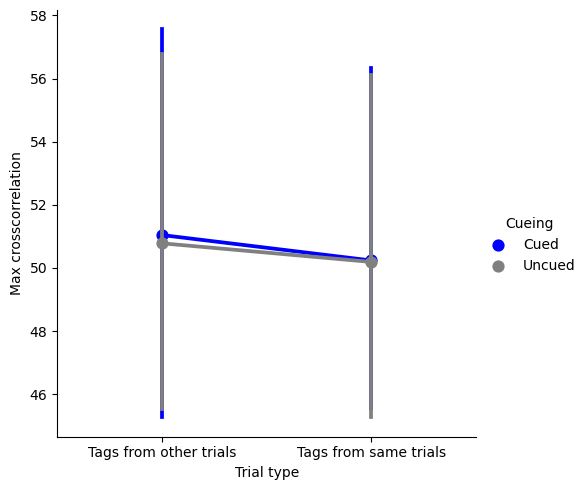

In [167]:
sns.catplot(y='Max crosscorrelation', x='Trial type', hue='Cueing', data=crosscorr, kind='point', units='participant', palette=['blue','grey'], aspect=1)

In [71]:
crosscorr.loc[crosscorr['trial_type'] == 'same', 'trial_type'] = 0
crosscorr.loc[crosscorr['trial_type'] == 'other', 'trial_type'] = 1
crosscorr.loc[crosscorr['cued'] == 'uncued', 'cued'] = 0
crosscorr.loc[crosscorr['cued'] == 'cued', 'cued'] = 1
print(crosscorr)

            value trial_type cued participant  Cor EEG/tag
0       44.509015          0    1          A0    44.509015
1       48.422197          0    1          A0    48.422197
2       32.616698          0    1          A0    32.616698
3       47.114501          0    1          A0    47.114501
4       47.083162          0    1          A0    47.083162
...           ...        ...  ...         ...          ...
107803  61.352991          1    0          A2    61.352991
107804  43.102238          1    0          A2    43.102238
107805  60.650479          1    0          A2    60.650479
107806  46.639217          1    0          A2    46.639217
107807  66.757315          1    0          A2    66.757315

[290728 rows x 5 columns]


In [72]:
md = smf.mixedlm("value ~ cued * trial_type", crosscorr, groups=crosscorr["participant"], missing='drop')
mdf = md.fit()
print(mdf.summary())

               Mixed Linear Model Regression Results
Model:                MixedLM    Dependent Variable:    value       
No. Observations:     146688     Method:                REML        
No. Groups:           3          Scale:                 110.2877    
Min. group size:      44356      Log-Likelihood:        -553098.2440
Max. group size:      54370      Converged:             Yes         
Mean group size:      48896.0                                       
--------------------------------------------------------------------
                           Coef.  Std.Err.   z   P>|z| [0.025 0.975]
--------------------------------------------------------------------
Intercept                  50.174    6.077 8.256 0.000 38.263 62.084
cued[T.1]                   0.047    0.577 0.082 0.935 -1.084  1.179
trial_type[T.1]             0.589    0.410 1.437 0.151 -0.214  1.393
cued[T.1]:trial_type[T.1]   0.250    0.580 0.431 0.667 -0.887  1.386
Group Var                 110.288                 

/home/lea/anaconda3/envs/ads_thesis/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2262: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


## 2.2 Cross-correlation of the averaged tags 

In [193]:
participants = ['A0', 'A1', 'A2'] 
crosscorr = []
for participant in participants:
    df_participant = pd.read_csv(f'files/{participant}_crosscorr_time_avgtag.csv', index_col=False)
    df_participant['participant'] = participant
    crosscorr.append(df_participant)
crosscorr = pd.concat(crosscorr)
crosscorr['Cor EEG/tag'] = crosscorr['value']

Text(0, 0.5, 'Cor EEG/tag')

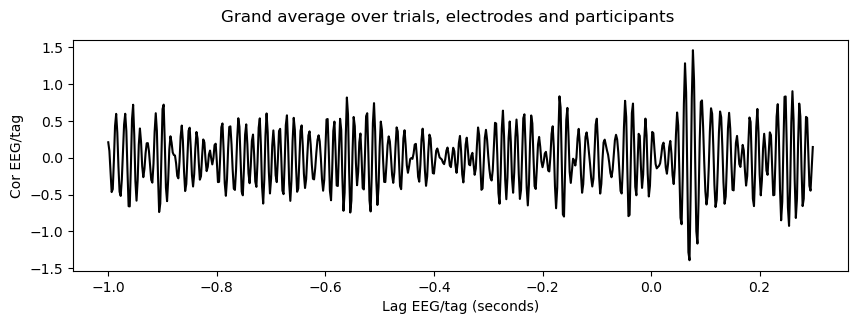

In [194]:
fig, ax = plt.subplots(figsize=(10,3))
average = crosscorr.groupby('Time').value.mean().reset_index()
ax.plot(average.Time, average.value, color='black')


plt.suptitle('Grand average over trials, electrodes and participants');
ax.set_xlabel('Lag EEG/tag (seconds)')
ax.set_ylabel('Cor EEG/tag')

### 2.2.1 Pre-post on averaged

In [200]:
participants = ['A0', 'A1', 'A2'] 
crosscorr = []
for participant in participants:
    df_participant = pd.read_csv(f'files/{participant}_crosscor_prepost_avgtag.csv', index_col=False)
    df_participant['participant'] = participant
    crosscorr.append(df_participant)
crosscorr = pd.concat(crosscorr)
crosscorr = crosscorr.groupby(['prepost', 'participant'])['value'].mean().reset_index()
crosscorr['Max crosscorrelation'] = crosscorr['value']
crosscorr['Pre/post tag display'] = crosscorr['prepost'].replace({'pre': 'Pre-display', 'post': 'Post-display'})


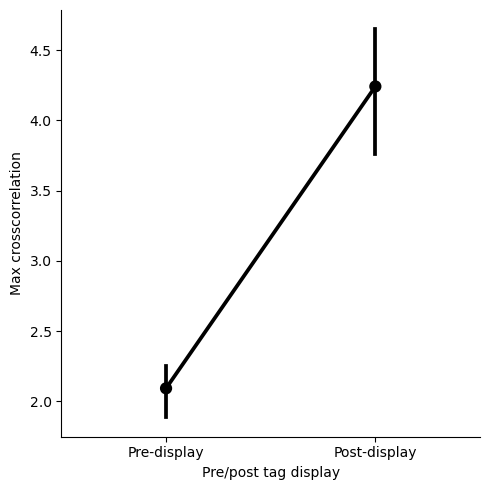

In [201]:
sns.catplot(y='Max crosscorrelation', x='Pre/post tag display',  data=crosscorr, kind='point', order=['Pre-display','Post-display'], color='black')

In [202]:
crosscorr.loc[crosscorr['prepost'] == 'pre', 'prepost'] = 0
crosscorr.loc[crosscorr['prepost'] == 'post', 'prepost'] = 1
print(crosscorr)

  prepost participant     value  Max crosscorrelation Pre/post tag display
0       1          A0  4.313015              4.313015         Post-display
1       1          A1  3.763716              3.763716         Post-display
2       1          A2  4.647572              4.647572         Post-display
3       0          A0  2.140018              2.140018          Pre-display
4       0          A1  2.250862              2.250862          Pre-display
5       0          A2  1.885730              1.885730          Pre-display


In [203]:
md = smf.mixedlm("value ~ prepost", crosscorr, groups=crosscorr["participant"])
mdf = md.fit()
print(mdf.summary())

        Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: value  
No. Observations:  6       Method:             REML   
No. Groups:        3       Scale:              0.1171 
Min. group size:   2       Log-Likelihood:     -2.4848
Max. group size:   2       Converged:          Yes    
Mean group size:   2.0                                
------------------------------------------------------
             Coef. Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------
Intercept    2.092    0.198 10.590 0.000  1.705  2.479
prepost[T.1] 2.149    0.279  7.692 0.000  1.602  2.697
Group Var    0.000                                    



/home/lea/anaconda3/envs/ads_thesis/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/lea/anaconda3/envs/ads_thesis/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/lea/anaconda3/envs/ads_thesis/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/lea/anaconda3/envs/ads_thesis/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2262: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


### 2.2.2 Comparing same vs other trials

In [208]:
participants = ['A0', 'A1', 'A2'] 
crosscorr = []
for participant in participants:
    df_participant = pd.read_csv(f'files/{participant}_crosscor_sameother_averaged.csv', index_col=False)
    df_participant['participant'] = participant
    crosscorr.append(df_participant)
crosscorr = pd.concat(crosscorr)

crosscorr['Max crosscorrelation'] = crosscorr['value']
#averaging over electrodes
# crosscorr = crosscorr.groupby(['participant','trial_type']).mean().reset_index()
crosscorr['Trial type'] = crosscorr['trial_type'].replace({'same': 'Tags from same trials', 'other': 'Tags from other trials'})


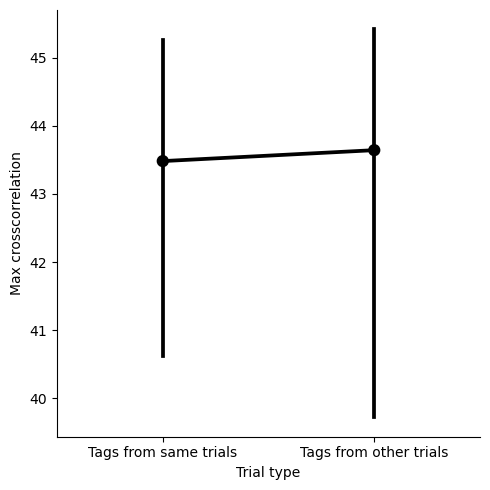

In [209]:
sns.catplot(y='Max crosscorrelation', x='Trial type',  data=crosscorr, kind='point', units='participant', color='black')

In [210]:
crosscorr.loc[crosscorr['trial_type'] == 'same', 'trial_type'] = 0
crosscorr.loc[crosscorr['trial_type'] == 'other', 'trial_type'] = 1
print(crosscorr)

           value trial_type participant  Max crosscorrelation  \
0      50.178525          0          A0             50.178525   
1      42.998237          0          A0             42.998237   
2      43.389627          0          A0             43.389627   
3      49.050294          0          A0             49.050294   
4      34.563051          0          A0             34.563051   
...          ...        ...         ...                   ...   
53899  46.831044          1          A2             46.831044   
53900  56.703178          1          A2             56.703178   
53901  52.376857          1          A2             52.376857   
53902  54.042171          1          A2             54.042171   
53903  50.997101          1          A2             50.997101   

                   Trial type  
0       Tags from same trials  
1       Tags from same trials  
2       Tags from same trials  
3       Tags from same trials  
4       Tags from same trials  
...                       .

In [211]:
md = smf.mixedlm("value ~ trial_type", crosscorr, groups=crosscorr["participant"], missing='drop')
mdf = md.fit()
print(mdf.summary())

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: value       
No. Observations: 78351   Method:             REML        
No. Groups:       3       Scale:              81.1011     
Min. group size:  23981   Log-Likelihood:     -283388.7296
Max. group size:  27185   Converged:          Yes         
Mean group size:  26117.0                                 
----------------------------------------------------------
                Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------
Intercept       43.407    1.970 22.039 0.000 39.546 47.267
trial_type[T.1]  0.083    0.346  0.240 0.810 -0.594  0.760
Group Var       11.282    1.333                           



## 2.3 Search in subwindows of the tag

In [26]:
from noise_tagging_funs import generate_noise_periods

sfreq = 480 # EEG and tag 
tmin_eeg, tmax_eeg = 0, 2.29

# Define period of noise to analyze
start = 0
duration = .4
step = .1
end = tmax_eeg-duration
noise_periods = generate_noise_periods(start, end, duration, step)[::-1]

# store results
n_bins = 20
time_bins = np.linspace(start, end, n_bins+1)*sfreq
max_values_per_bin = np.zeros((len(noise_periods), n_bins))

### 2.3.1  Timing of the crosscorrelation with the average of the two tags

In [27]:
participants = ['A0', 'A1', 'A2'] 
summed = []
for participant in participants:
    arr_participant = np.load(f'files/averaged_tags_{participant}.npy')
    summed.append(arr_participant)
summed = np.stack(summed)

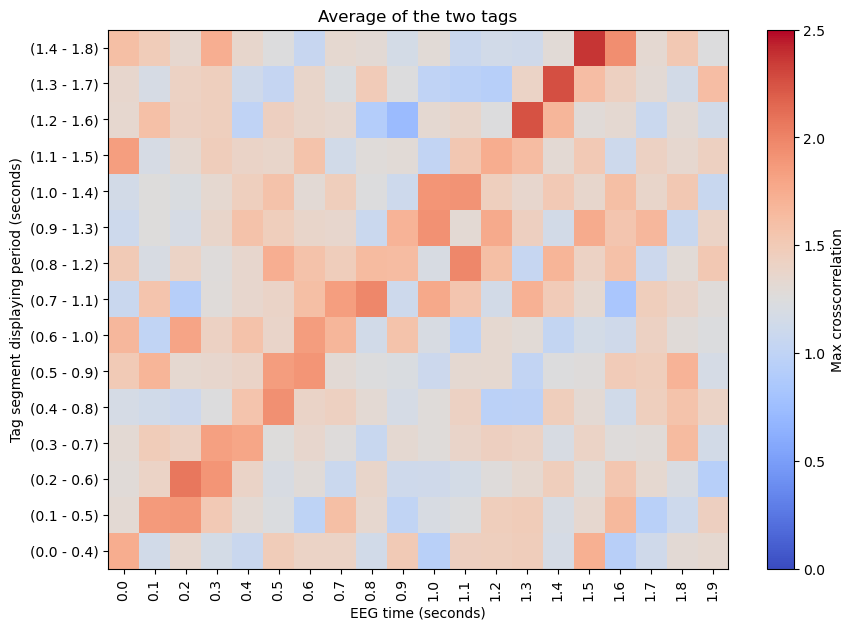

In [235]:
fig, ax = plt.subplots(figsize=(10,7))
avg_summed = summed.mean(axis=0)
cax = ax.imshow(avg_summed, aspect='auto', cmap='coolwarm', interpolation='nearest', vmin=0, vmax=2.5)

cbar = fig.colorbar(cax)
cbar.set_label('Max crosscorrelation')

ax.set_xlabel('EEG time (seconds)')
ax.set_ylabel('Tag segment displaying period (seconds)')
ax.set_title('Average of the two tags')

bin_times = np.linspace(start, end, n_bins)
ax.set_xticks(np.arange(n_bins))
ax.set_xticklabels([f'{bt:.1f}' for bt in bin_times], rotation=90)
ax.set_yticks(np.arange(len(noise_periods)))
ax.set_yticklabels([f'({i[0]:.1f} - {i[1]:.1f})' for i in noise_periods])


plt.show()


In [236]:
idx_noise_periods, idx_bin_times = np.where(summed.mean(axis=0) > 2.2)
for period, bin in zip(idx_noise_periods, idx_bin_times):
    print(f'Significant for noise : {np.array(noise_periods)[period]} and bin {np.array(bin_times)[bin]:.1f} (zscore = {summed.mean(axis=0)[period, bin]})')

Significant for noise : [1.4 1.8] and bin 1.5 (zscore = 2.3718043709394245)
Significant for noise : [1.3 1.7] and bin 1.4 (zscore = 2.260306295411565)
Significant for noise : [1.2 1.6] and bin 1.3 (zscore = 2.252227123144903)


### 2.3.2 Timing of the crosscorrelation with each of the tags (cueing effect)

In [237]:
participants = ['A0','A1', 'A2'] 
cued, uncued = [], []
for participant in participants:
    arr_participant = np.load(f'files/cued_tags_with_target_{participant}.npy')
    cued.append(arr_participant)
    arr_participant = np.load(f'files/uncued_tags_with_target_{participant}.npy')
    uncued.append(arr_participant)
cued = np.stack(cued)
uncued = np.stack(uncued)

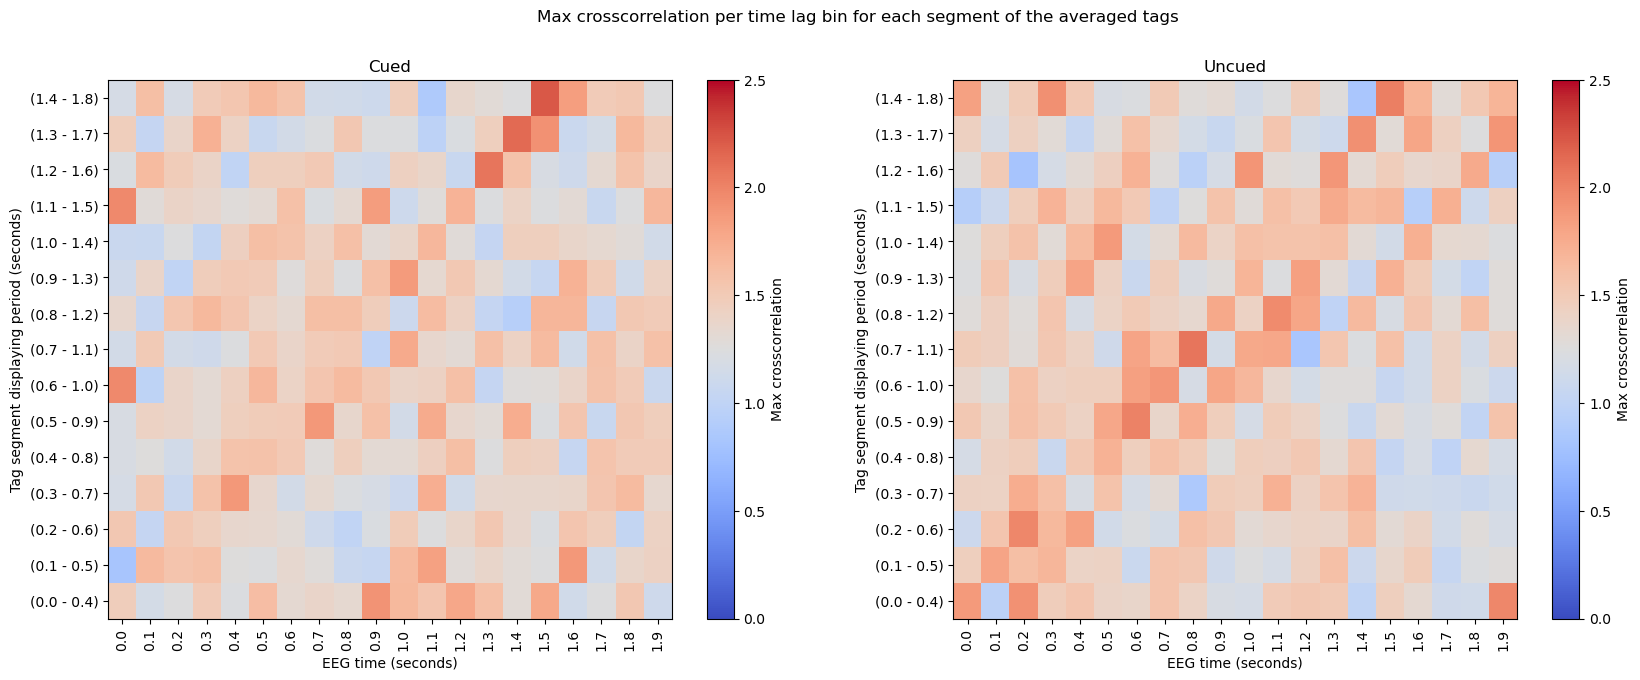

In [238]:
fig, ax = plt.subplots(1,2, figsize=(20,7), sharey=False)
cax = ax[0].imshow(cued.mean(axis=0), aspect='auto', cmap='coolwarm', interpolation='nearest', vmin=0, vmax=2.5)
cbar = fig.colorbar(cax)
cbar.set_label('Max crosscorrelation')
cax = ax[1].imshow(uncued.mean(axis=0), aspect='auto', cmap='coolwarm', interpolation='nearest', vmin=0, vmax=2.5)
cbar = fig.colorbar(cax)
cbar.set_label('Max crosscorrelation')

plt.suptitle('Max crosscorrelation per time lag bin for each segment of the averaged tags')

threshold = 1.96
bin_times = np.linspace(start, end, n_bins)
for i, axi in enumerate(ax):
    axi.set_xticks(np.arange(n_bins))
    axi.set_xticklabels([f'{bt:.1f}' for bt in bin_times], rotation=90)
    axi.set_yticks(np.arange(len(noise_periods)))
    axi.set_yticklabels([f'({i[0]:.1f} - {i[1]:.1f})' for i in noise_periods])
    axi.set_xlabel('EEG time (seconds)')
    axi.set_ylabel('Tag segment displaying period (seconds)')

ax[0].set_title('Cued')
ax[1].set_title('Uncued')
plt.show()
plt.show()

In [48]:
idx_noise_periods, idx_bin_times = np.where(cued.mean(axis=0) > 2.2)
for period, bin in zip(idx_noise_periods, idx_bin_times):
    print(f'[Cued] Significant for noise : {np.array(noise_periods)[period]} and bin {np.array(bin_times)[bin]:.1f}  (zscore = {cued.mean(axis=0)[period, bin]})')

[Cued] Significant for noise : [1.4 1.8] and bin 1.5  (zscore = 2.222931725440555)


In [49]:
idx_noise_periods, idx_bin_times = np.where(uncued.mean(axis=0) > 2.2)
for period, bin in zip(idx_noise_periods, idx_bin_times):
    print(f'[Uncued] Significant for noise : {np.array(noise_periods)[period]} and bin {np.array(bin_times)[bin]:.1f}  (zscore = {ucued.mean(axis=0)[period, bin]})')

In [227]:
idx_noise_periods, idx_bin_times = np.where(cued.mean(axis=0) > 1.96)
for period, bin in zip(idx_noise_periods, idx_bin_times):
    print(f'[Cued] Significant for noise : {np.array(noise_periods)[period]} and bin {np.array(bin_times)[bin]:.1f}  (zscore = {cued.mean(axis=0)[period, bin]})')

[Cued] Significant for noise : [1.4 1.8] and bin 1.5  (zscore = 2.222931725440555)
[Cued] Significant for noise : [1.3 1.7] and bin 1.4  (zscore = 2.13740343902824)
[Cued] Significant for noise : [1.2 1.6] and bin 1.3  (zscore = 2.0742293217574157)
[Cued] Significant for noise : [1.1 1.5] and bin 0.0  (zscore = 1.966022147530328)
[Cued] Significant for noise : [0.6 1. ] and bin 0.0  (zscore = 1.9678252737658994)


In [232]:
idx_noise_periods, idx_bin_times = np.where(uncued.mean(axis=0) > 1.96)
for period, bin in zip(idx_noise_periods, idx_bin_times):
    print(f'[Uncued] Significant for noise : {np.array(noise_periods)[period]} and bin {np.array(bin_times)[bin]:.1f}  (zscore = {uncued.mean(axis=0)[period, bin]})')

[Uncued] Significant for noise : [1.4 1.8] and bin 1.5  (zscore = 2.024433775058145)
[Uncued] Significant for noise : [0.7 1.1] and bin 0.8  (zscore = 2.0796209508051144)
[Uncued] Significant for noise : [0.5 0.9] and bin 0.6  (zscore = 2.0080438157583287)
[Uncued] Significant for noise : [0.2 0.6] and bin 0.2  (zscore = 1.9753841936630927)
[Uncued] Significant for noise : [0.  0.4] and bin 1.9  (zscore = 1.9761867890338498)


# 3. Decoding

In [33]:
# participants = ['A0','A1', 'A2'] 
# scores = []
# for participant in participants:
#     arr_participant = np.loadtxt(f'files/{participant}_decoding.npy')
#     scores.append(arr_participant)
# scores = np.stack(scores)
# times = np.loadtxt('files/decoding_times.npy')

In [34]:
# plt.subplots(figsize=(15,4))
# plt.plot(times, scores.mean(axis=0))
# plt.hlines(.5, -1, 2.3, 'k')
# plt.ylabel('AUC')
# plt.xlabel('EEG time')

In [35]:
# plt.subplots(figsize=(15,4))

# plt.plot(times, scores.T[:,::-1])
# plt.ylabel('AUC')
# plt.xlabel('EEG time')